In [7]:
goal = "avgFullGCPauseEr"
sep = ';'
with open("summary.csv", "+r") as summary_file:
    for line in summary_file.readlines():
        if goal+sep in line:
            print(line.split(sep)[1])

In [42]:
current_state = 0.06
next_state = 0.02

reward = abs(next_state - current_state) / current_state
reward

0.6666666666666666

In [33]:
import numpy as np
state = np.array([list([1, 1]), 3], dtype=object)
state[0][1] += 1
state

array([list([1, 2]), 3], dtype=object)

In [29]:
import os
import subprocess

goal = "maxFullGCPause"
sep = ';'
jdk = "/Users/ellkrauze/projects/gc-ml/jdk-11.0.20.1.jdk"

env = os.environ.copy()
env["PATH"] = f"{jdk}/bin:{env['PATH']}"

try:
    output = subprocess.check_output(
        ["java",
        "-cp", "gcviewer-1.36.jar",
        "com.tagtraum.perf.gcviewer.GCViewer",
        "gc-xalan.txt",
        "summary.csv", 
        "-t", "SUMMARY"],
        stderr=subprocess.STDOUT,
        text = True,
        env=env)
    print(output)
except subprocess.CalledProcessError as e:
    print("Command failed with return code", e.returncode)
    print(e.output)


Command failed with return code 255
Aug 29, 2023 2:31:59 PM com.tagtraum.perf.gcviewer.GCViewer doMain
INFO: GCViewer command line mode
Aug 29, 2023 2:31:59 PM com.tagtraum.perf.gcviewer.imp.DataReaderFacade loadModel
INFO: GCViewer version 1.36 (2019-11-30T21:36:26+0000)
Aug 29, 2023 2:31:59 PM com.tagtraum.perf.gcviewer.imp.DataReaderFacade loadModel
java.io.FileNotFoundException: /Users/ellkrauze/projects/gc-ml/gc-xalan.txt (No such file or directory) /Users/ellkrauze/projects/gc-ml/gc-xalan.txt (No such file or directory)
Aug 29, 2023 2:31:59 PM com.tagtraum.perf.gcviewer.GCViewer doMain
SEVERE: Error during report generation
com.tagtraum.perf.gcviewer.imp.DataReaderException
	at com.tagtraum.perf.gcviewer.imp.DataReaderFacade.loadModel(DataReaderFacade.java:61)
	at com.tagtraum.perf.gcviewer.GCViewer.export(GCViewer.java:92)
	at com.tagtraum.perf.gcviewer.GCViewer.doMain(GCViewer.java:73)
	at com.tagtraum.perf.gcviewer.GCViewer.main(GCViewer.java:43)
Caused by: java.io.FileNotFoun

In [23]:
summary_file.readlines()

ValueError: I/O operation on closed file.

In [ ]:
import subprocess

flags_process = subprocess.Popen(
    ["java", "-XX:+PrintFlagsFinal", "-version"],
    stdout=subprocess.PIPE,
    text=True,
    env=self._env)

grep_process = subprocess.Popen(
    ["grep", opt, "-m", "1"],
    stdin=flags_process.stdout,
    stdout=subprocess.PIPE,
    text=True)

output, error = grep_process.communicate()
result = re.findall("\d+", output)[0]

In [2]:
import scipy.optimize as optimize
import numpy as np

def _y(params):
    x, y = params
    # z_min = z(0; 1) = -2
    return 3*x**2 + x*y + 2*y**2 - x - 4*y

initial_guess = [1, 1]
result = optimize.minimize(_y, initial_guess)
if result.success:
    target_arg = np.round(result.x, 5)
    target_f = np.round(result.fun, 5)
    # returns np.array([[x, y], z], dtype=np.int32)
    state = np.array([target_arg, target_f], dtype=object)
    print(state)
else:
    raise ValueError(result.message)

[array([-0.,  1.]) -2.0]


In [4]:
def transform_action(action):
    # Convert action from [0, 1] to [-1, 1]
    return 2 * action - 1

_state = np.array([[5, 6], 10], dtype=object)

def _decrease_x():
    _state[0][0] -= 1

def _increase_x():
    _state[0][0] += 1

def _decrease_y():
    _state[0][1] -= 1

def _increase_y():
    _state[0][1] += 1


action_mapping = {
    0: _decrease_x,
    1: _increase_x,
    2: _decrease_y,
    3: _increase_y,
}

action_arr = [0, 1, 2, 3]
random_action = np.random.choice(action_arr)
# print(random_action)
# print(_state)
print(f"Action {random_action}, state {_state}")
action_mapping.get(random_action)()
print(_state)
# for action in action_arr:
#     variable = action_arr.index(action)
#     result_action = transform_action(variable % 2)
#     print(f"Variable {variable}, action {result_action}")
    
# action_arr.index(5) % 2

Action 2, state [list([5, 6]) 10]
[list([5, 5]) 10]


In [ ]:
def _get_JVM_opt_value(self, opt: str):
    """
    Get the defaul JVM option value from environment
    by parsing java PrintFlagsFinal output.

    Parameters:
    opt (str): JVM option name

    Returns:
    (int) Default JVM option value
    """
    flags_process = subprocess.Popen(
        ["java", "-XX:+PrintFlagsFinal", "-version"],
        stdout=subprocess.PIPE,
        text=True,
        env=env)

    grep_process = subprocess.Popen(
        ["grep", opt, "-m", "1"],
        stdin=flags_process.stdout,
        stdout=subprocess.PIPE,
        text=True)

    output, error = grep_process.communicate()
    result = re.findall("\d+", output)[0]

    return int(result)

In [29]:
len(list(_action_mapping.keys()))

4

In [30]:
state 

array([list([100, 200]), 300], dtype=object)

In [31]:
new_state = np.copy(state)
new_state

array([list([100, 200]), 300], dtype=object)

In [28]:
_num_variables = 2
_flags = {
    "MaxHeapSize": {"min": 2.68e+8, "max": 4.29e+9},
    "InitialHeapSize": {"min": 1.25e+8, "max": 2.5e+8},
}
_action_mapping = {
    0: 1,
    1: 2,
    2: 3,
    3: 4,
}

assert len(list(_action_mapping.keys())) == 2*_num_variables - 1

AssertionError: 

In [24]:
flags = {
    "MaxHeapSize": {"min": 268435456, "max": 4294967296},
    "InitialHeapSize": {"min": 20, "max": 200},
}

state = np.array([[100, 200], 300], dtype=object)

jvm_opts = []
for flag_name in flags.keys():
    i = list(flags.keys()).index(flag_name)
    flag_value = state[0][i]
    jvm_opt = f"-XX:{flag_name}={flag_value}"
    jvm_opts.append(jvm_opt)
    print(jvm_opts)

['-XX:MaxHeapSize=100']
['-XX:MaxHeapSize=100', '-XX:InitialHeapSize=200']


In [11]:
print(type(int(np.array(0))))

<class 'int'>


In [88]:
num_variables = 2
min_action_values = {
            "x": -2,
            "y": -10,
        }
max_action_values = {
            "x": 2,
            "y": 10,
        }
def _y(params):
    x, y = params
    # z_min = z(0; 1) = -2
    return 3*x**2 + x*y + 2*y**2 - x - 4*y

def _get_target():
    initial_guess = [1, 1]
    result = optimize.minimize(_y, initial_guess)
    if result.success:
        target_arg = np.round(result.x, 5)
        target_f = np.round(result.fun, 5)
        # returns np.array([[x, y], z], dtype=np.int32)
        return np.array([target_arg, target_f], dtype=object)
    else:
        raise ValueError(result.message)

def _get_initial_state():
    state_args = np.random.randint(
        list(min_action_values.values()), 
        list(max_action_values.values()),
        size=(num_variables,)
    )
    state_f = _y(state_args)
    return np.array([state_args, state_f], dtype=object)

_target_location = _get_target()
_state = _get_initial_state()

# We will sample agent's location until 
# it does not coincide with the target location
# while np.isclose(_state, _target_location): 
#     _state = _get_initial_state()
# np.random.randint(list(min_action_values.values()), list(max_action_values.values()), size=(num_variables,), dtype=np.int32)

In [90]:
_state

array([array([0, 4]), 16], dtype=object)

In [91]:
_target_location

array([array([-0.,  1.]), -2.0], dtype=object)

In [100]:
np.allclose(_state[0], _target_location[0])

False

In [84]:
initial_guess = [1, 1]
result = optimize.minimize(_y, initial_guess)

target_arg = np.round(result.x, 5)
target_f = np.round(result.fun, 5)
# returns np.array([[x, y], z], dtype=np.int32)
# print(np.array([target_arg, target_f], dtype=object)) 

target_arg

array([-0.,  1.])

In [86]:
_state

array([array([1, 1]), 1], dtype=object)

In [82]:
_target_location

array([array([-0.,  1.]), -2.0], dtype=object)

In [24]:
list(result.x)

[-9.556824811227972e-09, 0.9999999906776661]

In [12]:
min_action_values = {"x": -2, "y": -10}
list(min_action_values.values())

[-2, -10]

In [6]:
np.random.randint(-5, 5, size=(2,), dtype=int)

array([-3, -5])

In [7]:
def _y(params):
    x, y = params
    # z_min = z(0; 1) = -2
    return 3*x**2 + x*y + 2*y**2 - x - 4*y

_y(np.random.randint(-5, 5, size=(2,), dtype=int))

142

In [1]:
from scipy.optimize import basinhopping
import math

def _y(x):
        return 2*math.pow(x, 3) - 3*math.pow(x, 2) - 12 * x + 1

x0 = [1.]
minimizer_kwargs = {"method": "BFGS"}
solution = basinhopping(_y, x0, minimizer_kwargs=minimizer_kwargs,
            niter=200)

In [1]:
type(solution.x)

NameError: name 'solution' is not defined

### Save animation 

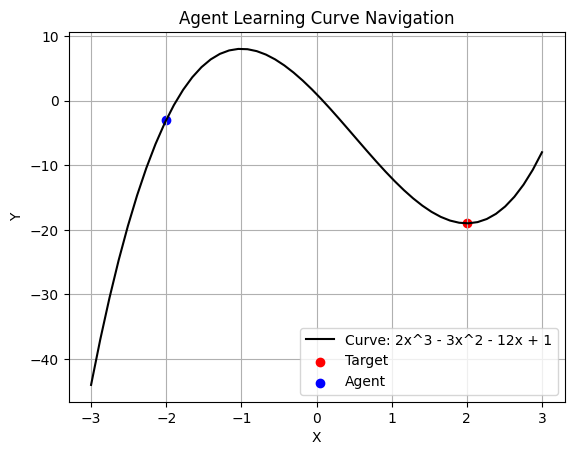

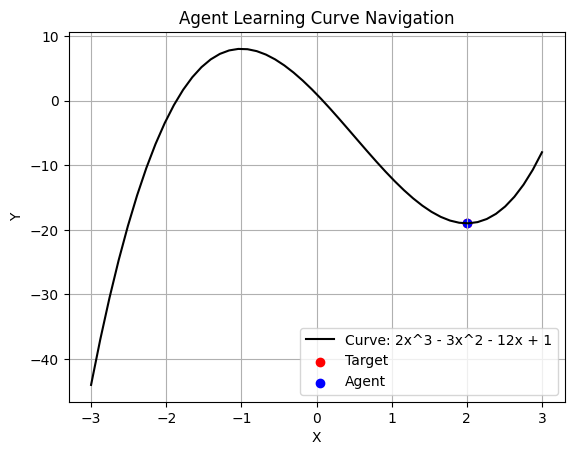

In [6]:
from matplotlib.animation import FuncAnimation

def animate_curve_nav(env, steps):
    fig, ax = plt.subplots()
    env.ax = ax  # Set the environment's ax to the animation's ax
    
    def animate(frame):
        env.step(env.action_space.sample())  # Sample random action
        env.render()
    
    anim = FuncAnimation(fig, animate, frames=steps, interval=100)
    anim.save('curve_nav_animation.gif', writer='imagemagick', fps=10)  # Save as GIF

# Call animate_curve_nav with the environment and number of steps
animate_curve_nav(env, steps=200)

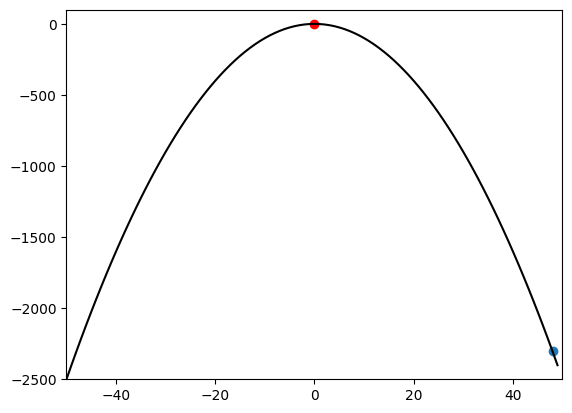

In [3]:
# plt.close('all') # close all previous plots

fig, ax = plt.subplots()
ax.set_xlim([-50, 50])
ax.set_ylim([-2500, 100])

# create a random line to plot
#------------------------------------------------------------------------------

def f(x):
    # return np.sin(np.divide(x, 100)) * 100 * 2
    return - x**2

x = np.arange(-50, 50)
y = [f(x) for x in x]
# print(x)
# print(y)

scat = ax.scatter(1, 0)
ax.plot(x, y, c='k')
ax.scatter(0, 0, c='r')
def animate(i):
    scat.set_offsets((x[i], y[i]))
    return scat,

anim = FuncAnimation(
    fig, 
    animate, 
    repeat=True,
    frames=len(x) - 1, 
    interval=50
)


# To save the animation using Pillow as a gif
writer = PillowWriter(
    fps=15,
    metadata=dict(artist='Me'),
    bitrate=1800
)
anim.save('scatter.gif', writer=writer)

plt.show()

-54.27504386670905
-294578.03867331916


TypeError: set_offsets() takes 2 positional arguments but 3 were given

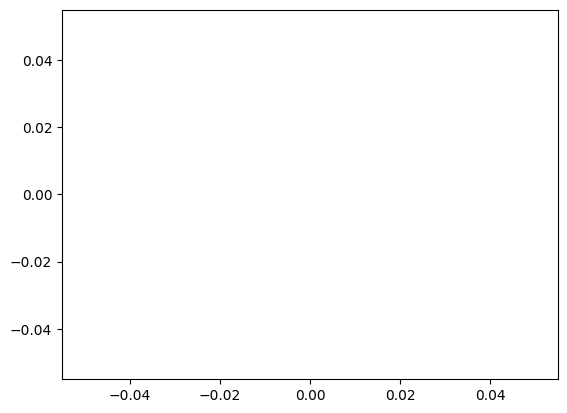

In [20]:
plt.close('all')

fig, ax = plt.subplots()

def y(x):
    # return np.sin(np.divide(x, 100)) * 100 * 2
    return -100 * x**2

line_x = np.arange(low, high, 0.1)
# line_y = [y(x) for x in np.arange(low, high, 0.1)]

# ax.plot(line_x, y(line_x), color='k')
scat = ax.scatter([], [], color='k')

for frame in range(100):
    new_x = np.random.uniform(low, high, size=None)
    new_y = y(new_x)
    # ax.cla()
    print(new_x)
    print(new_y)
    # ax.scatter(new_x, new_y)
    scat.set_offsets(new_x, new_y)
    fig.canvas.flush_events()

# anim = ArtistAnimation(fig, images) 
# anim.save(name, writer = 'imagemagic', fps = fps)

plt.show()

In [6]:
x = np.random.uniform(low, high, size=None)
np.sin(np.divide(x, 100)) * 100 * 2

2.1949014865547394

In [1]:
import pygame


window_size = 512
size = 10

pygame.init()
pygame.display.init()
window = pygame.display.set_mode((window_size, window_size))

canvas = pygame.Surface((window_size, window_size))
canvas.fill((255, 255, 255))

pix_square_size = (
    window_size / size
) 

pygame.draw.circle(window, 'red', (x, y), 10)

pygame.draw.circle(window, 'red', (x, y), 10)

# The following line copies our drawings from `canvas` to the visible window
window.blit(canvas, canvas.get_rect())
pygame.event.pump()
pygame.display.update()

pygame 2.5.1 (SDL 2.28.2, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


: 

In [14]:
gym.utils.seeding.np_random.uniform(10, 100, size=1)

AttributeError: 'function' object has no attribute 'uniform'

In [7]:

x = 6
print(np.clip(x, low, high))

4


In [8]:
import math

math.isclose(np.cos(np.divide(100039.76979446411, 100)), 0)

False

In [5]:
np.cos(np.divide(8638.03727722168, 100))

-0.013424798221964197

In [5]:

jdk = "/home/ellkrauze/projects/gc-ml/jdk-11.0.20"

def get_JVM_opt_value(opt: str):
    """
    Get the defaul JVM option value from environment
    by parsing java PrintFlagsFinal output.

    Parameters:
    opt (str): JVM option name

    Returns:
    (int) Default JVM option value
    """
    env = os.environ.copy()
    env["PATH"] = f"{jdk}/bin:{env['PATH']}"
    
    flags_process = subprocess.Popen(
        ["java", "-XX:+PrintFlagsFinal", "-version"],
        stdout=subprocess.PIPE,
        env = env,
        text=True)

    grep_process = subprocess.Popen(
        ["grep", opt, "-m", "1"],
        stdin=flags_process.stdout,
        stdout=subprocess.PIPE,
        text=True)

    output, error = grep_process.communicate()
    result = re.findall("\d+", output)[0]

    return int(result)


result = get_JVM_opt_value("MaxHeapSize")
print(result)

6283067392


In [12]:
np.array_equal((1, 3), (1, 2))

False

In [9]:
env = JVMEnvTest()

states = env.observation_space.shape
actions = env.action_space.n

print(states)
print(actions)


(2,)
3


In [7]:
np.array([1, 2]).shape

(2,)